In [11]:
import os
import cv2
from pathlib import Path

%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('~/Data/Metis/Steel/train.csv')

df['ImageId'] = df['ImageId_ClassId'].apply(lambda x: x.split('_')[0])
df['ClassId'] = df['ImageId_ClassId'].apply(lambda x: x.split('_')[1])
df['hasMask'] = ~ df['EncodedPixels'].isna()

print(df.shape)
df.head()

(50272, 5)


,ImageId_ClassId,EncodedPixels,ImageId,ClassId,hasMask
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,0002cc93b.jpg,1,True
1,0002cc93b.jpg_2,NaN,0002cc93b.jpg,2,False
2,0002cc93b.jpg_3,NaN,0002cc93b.jpg,3,False
3,0002cc93b.jpg_4,NaN,0002cc93b.jpg,4,False
4,00031f466.jpg_1,NaN,00031f466.jpg,1,False


In [3]:
mask1= (df['hasMask'] == True) & (df['ClassId'] == '1')
mask2= (df['hasMask'] == True) & (df['ClassId'] == '2')
mask3= (df['hasMask'] == True) & (df['ClassId'] == '3')
mask4= (df['hasMask'] == True) & (df['ClassId'] == '4')

df_1=df[mask1]
print(df_1.shape)

df_2=df[mask2]
print(df_2.shape)

df_3=df[mask3]
print(df_3.shape)

df_4=df[mask4]
print(df_4.shape)


df_1.head()

(897, 5)
(247, 5)
(5150, 5)
(801, 5)


,ImageId_ClassId,EncodedPixels,ImageId,ClassId,hasMask
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,0002cc93b.jpg,1,True
20,000a4bcdd.jpg_1,37607 3 37858 8 38108 14 38359 20 38610 25 388...,000a4bcdd.jpg,1,True
56,002fc4e19.jpg_1,146021 3 146275 10 146529 40 146783 46 147038 ...,002fc4e19.jpg,1,True
136,008ef3d74.jpg_1,356336 4 356587 11 356838 18 357089 25 357340 ...,008ef3d74.jpg,1,True
148,00ac8372f.jpg_1,101742 3 101998 12 102253 19 102301 22 102509 ...,00ac8372f.jpg,1,True


In [4]:
df_1=df[mask1]
print(df_1.shape)
df_3.head()

(897, 5)


,ImageId_ClassId,EncodedPixels,ImageId,ClassId,hasMask
18,0007a71bf.jpg_3,18661 28 18863 82 19091 110 19347 110 19603 11...,0007a71bf.jpg,3,True
30,0014fce06.jpg_3,229501 11 229741 33 229981 55 230221 77 230468...,0014fce06.jpg,3,True
46,0025bde0c.jpg_3,8458 14 8707 35 8963 48 9219 71 9475 88 9731 8...,0025bde0c.jpg,3,True
70,0046839bd.jpg_3,152926 1 153180 4 153434 6 153689 8 153943 11 ...,0046839bd.jpg,3,True
78,005d86c25.jpg_3,331 18 587 53 843 89 1099 124 1355 159 1611 17...,005d86c25.jpg,3,True


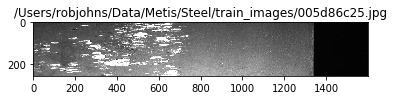

In [45]:
img_name = df_3["ImageId"][78]
#img_name = '0025bde0c.jpg'
abs_path = "/Users/robjohns/Data/Metis/Steel/train_images/"
filename=abs_path+img_name
impath = Path(filename)


if impath.exists() == True :
    seed_image = cv2.imread(filename)
    plt.imshow(seed_image)
    plt.title(str(impath))
    plt.show()
    
else:
    print('image/the limit does not exist')

In [37]:
seed_image.shape

(256, 1600, 3)